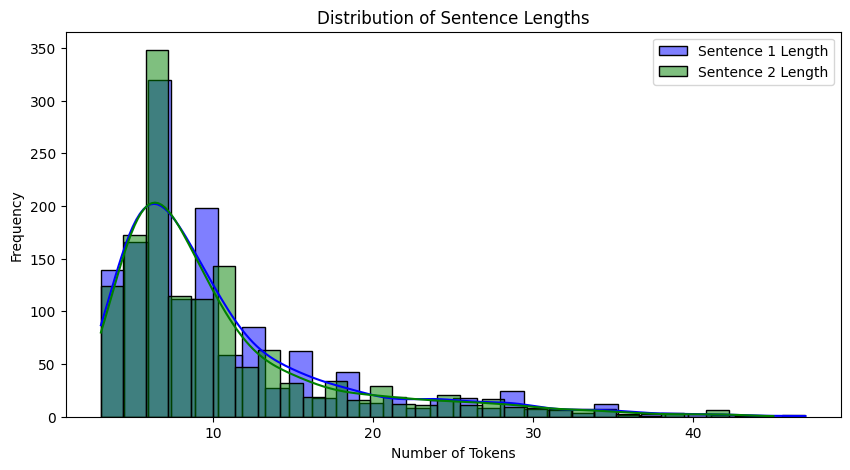

/var/folders/vr/l06k1wr54xl7r4jsv6_pkcd40000gq/T/ipykernel_61319/788593761.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


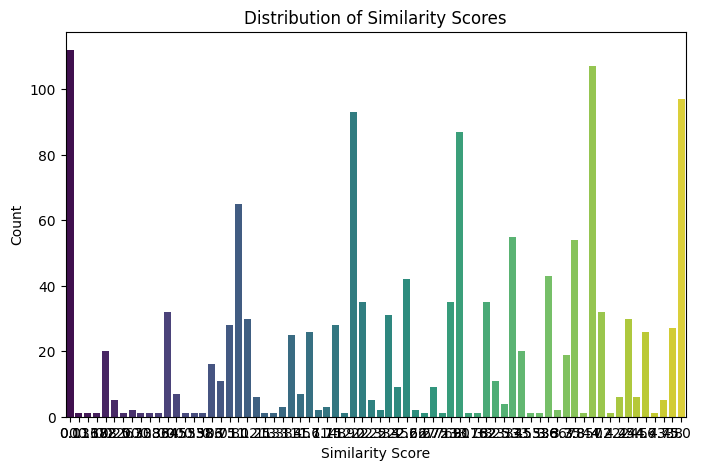

Basic Statistics of Similarity Scores:
count    1379.000000
mean        2.607917
std         1.525517
min         0.000000
25%         1.315000
50%         2.800000
75%         3.800000
max         5.000000
Name: score, dtype: float64

Skewness of Scores: -0.20191733643110446
Kurtosis of Scores: -1.089838105704869

Missing Values in Dataset:
sid                 0
score               0
sentence1           0
sentence2           0
sentence1_length    0
sentence2_length    0
dtype: int64

Duplicate Rows in Dataset:
0

Sentences with non-ASCII characters in Sentence 1: 1379
Sentences with non-ASCII characters in Sentence 2: 1379

Correlation Analysis of Similarity Scores with Sentence Lengths:
                     score  sentence1_length  sentence2_length
score             1.000000          0.158511          0.170115
sentence1_length  0.158511          1.000000          0.843997
sentence2_length  0.170115          0.843997          1.000000


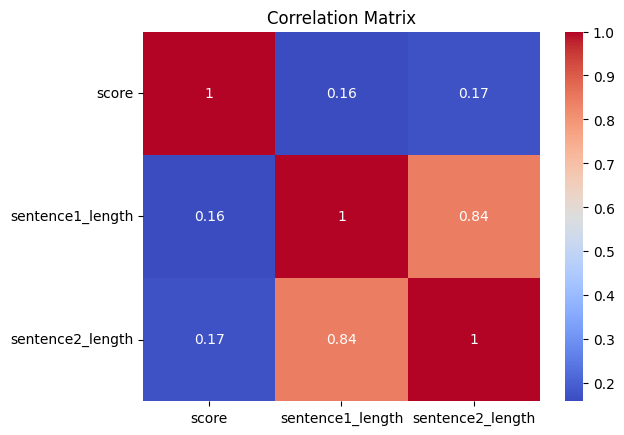

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

# Load your dataset
df = pd.read_csv("data/heb_sts_test.csv")

# 1. Distribution of Input Lengths
def analyze_sentence_lengths(df):
    tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')
    # Calculate the number of tokens for each sentence
    df['sentence1_length'] = df['sentence1'].apply(lambda x: len(tokenizer.tokenize(x)))
    df['sentence2_length'] = df['sentence2'].apply(lambda x: len(tokenizer.tokenize(x)))
    
    # Plot histograms
    plt.figure(figsize=(10, 5))
    sns.histplot(df['sentence1_length'], bins=30, color='blue', label='Sentence 1 Length', kde=True)
    sns.histplot(df['sentence2_length'], bins=30, color='green', label='Sentence 2 Length', kde=True)
    plt.title('Distribution of Sentence Lengths')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the function to analyze sentence lengths
analyze_sentence_lengths(df)

# 2. Distribution of Classes
def analyze_class_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='score', data=df, palette='viridis')
    plt.title('Distribution of Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.ylabel('Count')
    plt.show()

# Call the function to analyze class distribution
analyze_class_distribution(df)

# 3. Basic Descriptive Statistics
def basic_statistics(df):
    print("Basic Statistics of Similarity Scores:")
    print(df['score'].describe())
    
    # Check skewness and kurtosis
    print("\nSkewness of Scores:", df['score'].skew())
    print("Kurtosis of Scores:", df['score'].kurtosis())

# Call the function to print basic statistics
basic_statistics(df)

# 4. Missing Values and Data Quality
def check_missing_values(df):
    print("\nMissing Values in Dataset:")
    print(df.isnull().sum())

    print("\nDuplicate Rows in Dataset:")
    print(df.duplicated().sum())

# Call the function to check for missing values and duplicates
check_missing_values(df)

# 5. Text Quality Checks
def text_quality_checks(df):
    # Check for non-ASCII characters
    df['sentence1_non_ascii'] = df['sentence1'].apply(lambda x: any(ord(char) > 127 for char in x))
    df['sentence2_non_ascii'] = df['sentence2'].apply(lambda x: any(ord(char) > 127 for char in x))

    print("\nSentences with non-ASCII characters in Sentence 1:", df['sentence1_non_ascii'].sum())
    print("Sentences with non-ASCII characters in Sentence 2:", df['sentence2_non_ascii'].sum())

# Call the function to perform text quality checks
text_quality_checks(df)

# 6. Correlation Analysis
def correlation_analysis(df):
    # If similarity scores are numeric, calculate the correlation
    if df['score'].dtype in ['int64', 'float64']:
        print("\nCorrelation Analysis of Similarity Scores with Sentence Lengths:")
        correlation = df[['score', 'sentence1_length', 'sentence2_length']].corr()
        print(correlation)
        sns.heatmap(correlation, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

# Add length columns to dataframe before correlation analysis
df['sentence1_length'] = df['sentence1'].apply(lambda x: len(x.split()))
df['sentence2_length'] = df['sentence2'].apply(lambda x: len(x.split()))

# Call the function to perform correlation analysis
correlation_analysis(df)
